# Inteligencia Artificial en Ciberseguridad
Modelo de clasificación para identificación de ataques (Brute Force, Probing and Crypto Minner) dentro del trafico del red

In [1]:
# Importar las bibliotecas necesarias para cargar datos, dividir conjuntos,
# construir el modelo de vecinos más cercanos y evaluar el desempeño.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt


Cargamos los datos desde el archivo CSV utilizando pandas.


In [2]:
data = pd.read_csv("/content/HIKARI2021_v2.csv")

Visualizamos la estructura del conjunto de datos

In [3]:
data.head(1)
data.tail(2)

,flow_duration,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,fwd_pkts_payload.tot,fwd_pkts_payload.avg,fwd_pkts_payload.std,bwd_pkts_payload.tot,bwd_pkts_payload.avg,bwd_pkts_payload.std,...,active.max,active.tot,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,label
490410,1528769.0,1962363.0,0.0,1962363.0,150,50.0,0.0,0,0.0,0.0,...,1528769016266,1528769016266,1.528769e+12,0.0,0,0,0,0,0.0,1.0
490411,1528655.0,1962509.0,0.0,1962509.0,150,50.0,0.0,0,0.0,0.0,...,1528655052185,1528655052185,1.528655e+12,0.0,0,0,0,0,0.0,1.0


Separamos las características y las etiquetas del conjunto de datos.



In [ ]:
# Crear un nuevo DataFrame "data_X" eliminando la columna "label".
data_X = data.drop(["label"], axis=1)

# Crear una Serie "data_y" que contiene solo la columna "label".
data_y = data["label"]

Dividimos los datos en conjuntos de entrenamiento y prueba.
Utilizamos train_test_split para dividir las características y las etiquetas en conjuntos de entrenamiento y prueba.

Se reserva el 30% de los datos para el conjunto de prueba y se establece una semilla aleatoria (random_state) en 55 para reproducibilidad.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=55)


# ENTRENAMIENTO Y EVALUACION DEL MODELO CON KNN
Creamos y entrenamos el modelo de clasificación basado en k vecinos más cercanos (KNN).

In [8]:
# Creamos una instancia del modelo KNeighborsClassifier con 3 vecinos.
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el modelo utilizando el conjunto de entrenamiento.
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Realizamos predicciones con el modelo KNeighborsClassifier y evaluamos su desempeño.

In [9]:
# Realizamos predicciones en el conjunto de prueba utilizando el modelo KNN.
prediccion_knn = knn_model.predict(X_test)

# Definimos las etiquetas de clase para el informe de clasificación.
clases = ['Normal', 'Ataque']

# Imprimimos un informe de clasificación que muestra métricas de evaluación como precision, recall y f1-score.
print(classification_report(y_test, prediccion_knn, target_names=clases))


              precision    recall  f1-score   support



      Normal       0.93      0.95      0.94    135866

      Ataque       0.20      0.16      0.18     11258



    accuracy                           0.89    147124

   macro avg       0.57      0.55      0.56    147124

weighted avg       0.88      0.89      0.88    147124




Generamos una matriz de confusión para evaluar las predicciones del modelo comparando las etiquetas reales (y_test) con las predicciones del modelo (prediccion_knn).

In [10]:
confusion_matrix(y_test, prediccion_knn)

array([[128792,   7074],
       [  9469,   1789]])

Calculamos la curva ROC y el área bajo la curva (AUC) para evaluar el desempeño del modelo.

In [11]:
# Calcular la curva ROC comparando las etiquetas reales (y_test) con las predicciones del modelo (prediccion_knn).
false_positive, true_positive, _ = roc_curve(y_test, prediccion_knn)

# Calculamos el área bajo la curva (AUC) para evaluar el desempeño del modelo.
auc = roc_auc_score(y_test, prediccion_knn)
auc


0.5534216069490705

Graficar la curva ROC utilizando los valores de falsos positivos y verdaderos positivos.

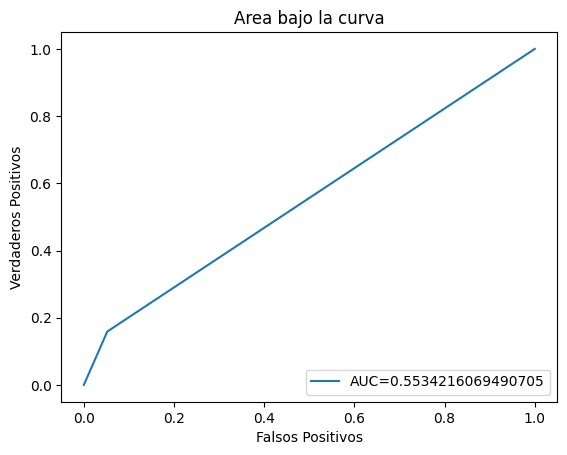

In [12]:
plt.plot(false_positive, true_positive, label="AUC="+str(auc))
plt.title("Area bajo la curva")
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.legend(loc=4)

# ENTRENAMIENTO Y PRUEBAS DE MODELO CON RANDOM FOREST
Crear y entrenar un modelo de clasificación utilizando el algoritmo de Bosques Aleatorios (Random Forest).

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del modelo RandomForestClassifier.
classifier = RandomForestClassifier()

# Entrenar el modelo utilizando el conjunto de entrenamiento.
classifier.fit(X_train, y_train)


Realizamos predicciones con el modelo de Bosques Aleatorios y evalua su desempeño.,

In [14]:
# Realizamos predicciones en el conjunto de prueba utilizando el modelo de Bosques Aleatorios.
prediction_RF = classifier.predict(X_test)

# Imprimimos un informe de clasificación que muestra métricas de evaluación como precision, recall y f1-score.
print(classification_report(y_test, prediction_RF))


              precision    recall  f1-score   support



         0.0       0.93      0.94      0.93    135866

         1.0       0.13      0.11      0.12     11258



    accuracy                           0.88    147124

   macro avg       0.53      0.52      0.52    147124

weighted avg       0.87      0.88      0.87    147124




Creamos un nuevo conjunto de datos y separamos características y etiquetas.


In [34]:
# Seleccionamos las columnas 'flow_duration', 'fwd_pkts_per_sec' y 'label' del conjunto de datos original.
data_gr6 = data[["flow_duration", "fwd_pkts_per_sec", "label"]]

# Creamos un nuevo conjunto de características "data_gr6X" excluyendo la columna 'label'.
data_gr6X = data_gr6.drop(['label'], axis=1)

# Creamos una Serie "data_gr6y" que contiene solo la columna 'label'.
data_gr6y = data_gr6['label']


Dividir el nuevo conjunto de datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Utilizamos train_test_split para dividir las características y las etiquetas del nuevo conjunto de datos.
# Se reserva el 30% de los datos para el conjunto de prueba y se establece una semilla aleatoria (random_state) en 55 para reproducibilidad.
XX_train, XX_test, yy_train, yy_test = train_test_split(data_gr6X, data_gr6y, test_size=0.3, random_state=55)

# ENTRENAMIENTO Y PRUEBAS DE MODELO CON REGRESION LOGISTICA
Creamos y entrenamos un modelo de regresión logística.


In [36]:
from sklearn.linear_model import LogisticRegression

# Crear una instancia del modelo LogisticRegression.
regresionlog = LogisticRegression()

# Entrenar el modelo utilizando el conjunto de entrenamiento del nuevo conjunto de datos.
regresionlog.fit(XX_train, yy_train)


LogisticRegression()

Realizar predicciones con el modelo de regresión logística y evaluar su desempeño.

In [37]:
# Realizamos predicciones en el conjunto de prueba utilizando el modelo de regresión logística.
prediccion_RLog = regresionlog.predict(XX_test)

# Definimos las etiquetas de clase para el informe de clasificación.
clases_RLog = ['Normal', 'Ataque']

# Imprimimos un informe de clasificación que muestra métricas de evaluación como precision, recall y f1-score.
print(classification_report(yy_test, prediccion_RLog, target_names=clases_RLog))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support



      Normal       0.92      1.00      0.96    135866

      Ataque       0.00      0.00      0.00     11258



    accuracy                           0.92    147124

   macro avg       0.46      0.50      0.48    147124

weighted avg       0.85      0.92      0.89    147124




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))
